https://thecleverprogrammer.com/2022/06/21/time-series-forecasting-with-arima/

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("UsdArsivSatis.csv", delimiter=';')
df

,Tarih,GiseSatis
0,03-01-2022,13.275
1,04-01-2022,13.540
2,05-01-2022,13.658
3,06-01-2022,13.861
4,07-01-2022,13.884
...,...,...
351,27-12-2022,18.828
352,28-12-2022,18.876
353,29-12-2022,18.916
354,30-12-2022,18.902


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      356 non-null    object 
 1   GiseSatis  356 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


In [5]:
#df['GiseSatis'] = df['GiseSatis'].astype(float)
df['Tarih'] = pd.to_datetime(df['Tarih'])


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9872\2387053552.py:2: UserWarning: Parsing '13-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Tarih'] = pd.to_datetime(df['Tarih'])
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9872\2387053552.py:2: UserWarning: Parsing '14-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Tarih'] = pd.to_datetime(df['Tarih'])
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9872\2387053552.py:2: UserWarning: Parsing '15-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Tarih'] = pd.to_datetime(df['Tarih'])
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9872\2387053552.py:2: UserWarning: Parsing '16-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Tarih'] = pd.to_datetime(df['Tarih'])
C:\Users\TOSHIBA\App

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Tarih      356 non-null    datetime64[ns]
 1   GiseSatis  356 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


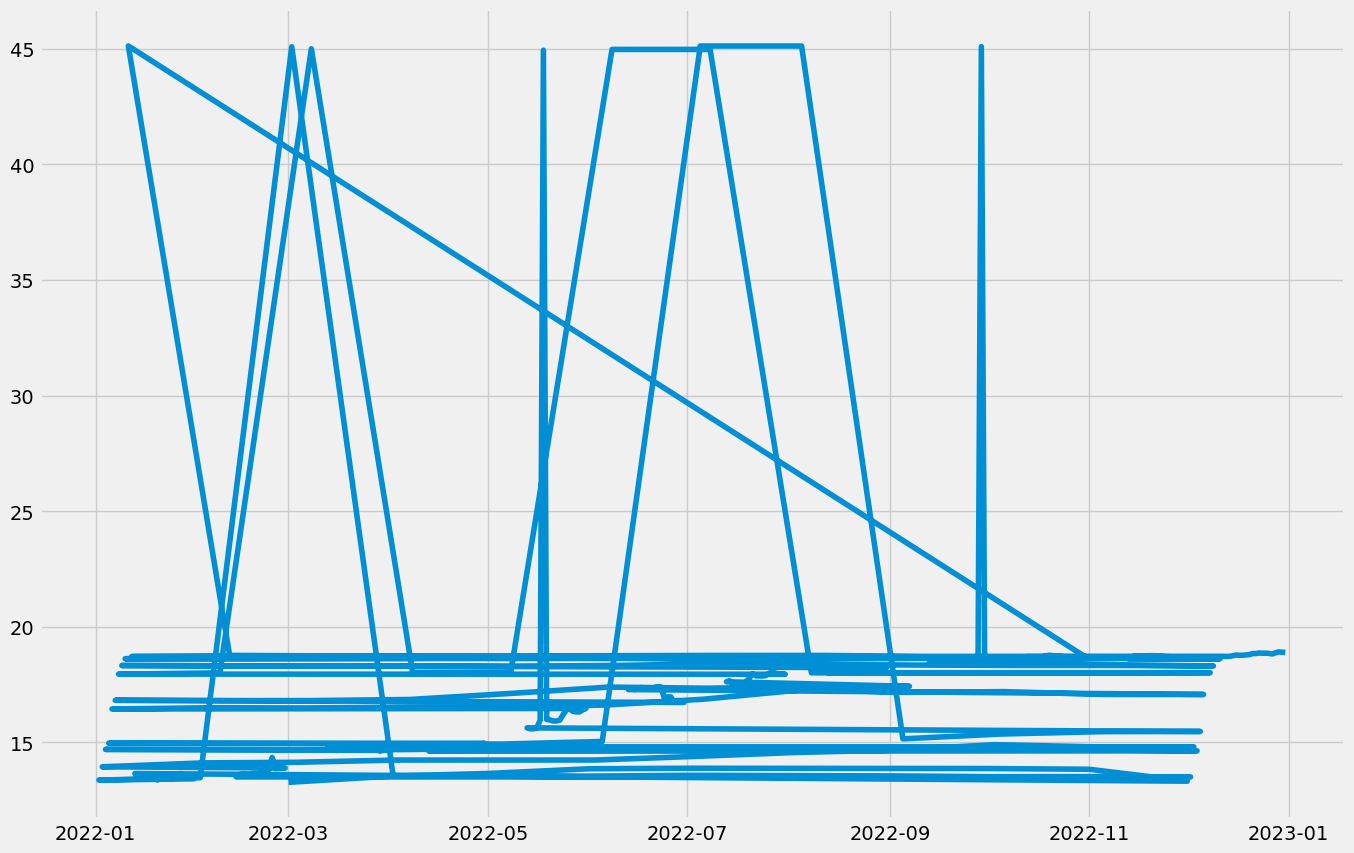

In [7]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(df["Tarih"], df["GiseSatis"])

<Figure size 640x480 with 0 Axes>

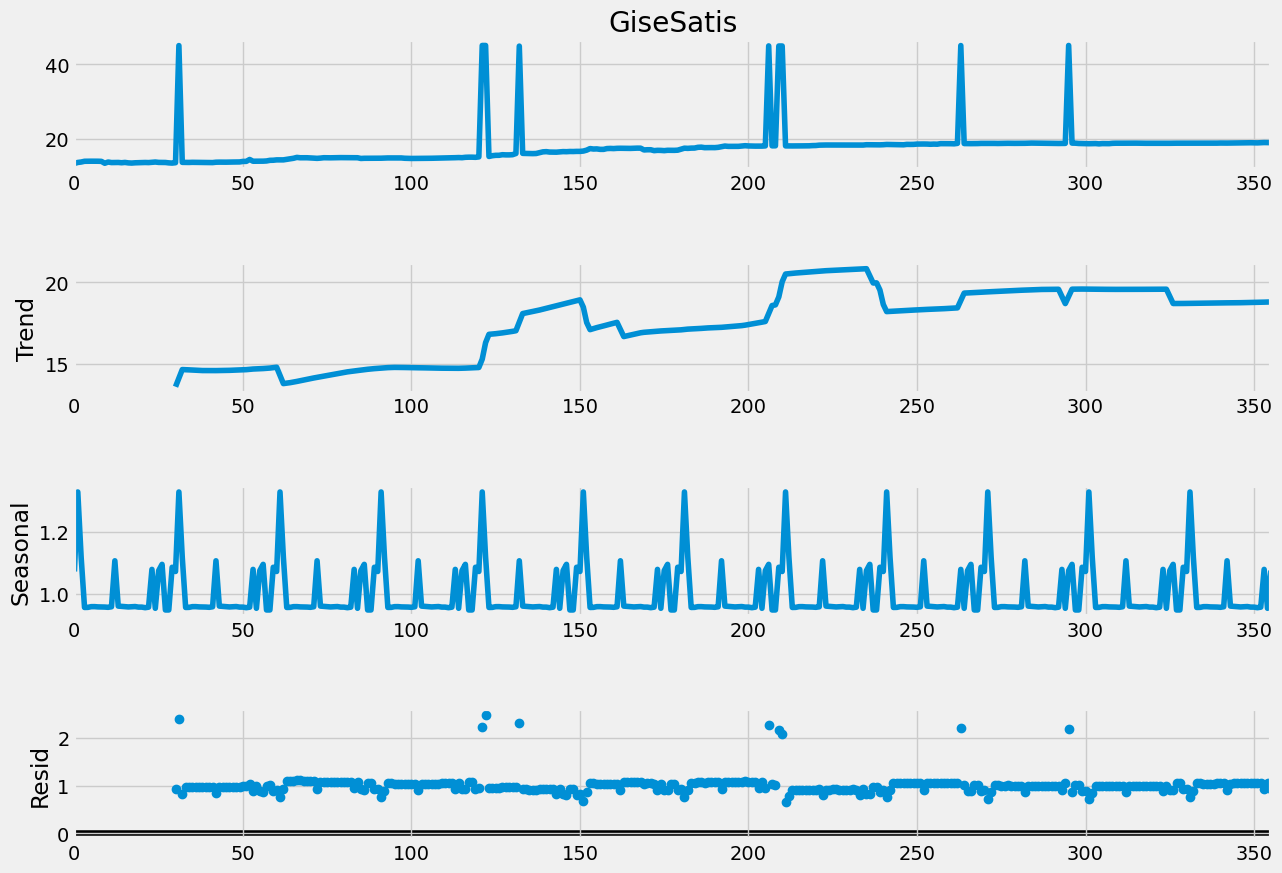

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["GiseSatis"], 
                            model='multiplicative', two_sided=False,  period= 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

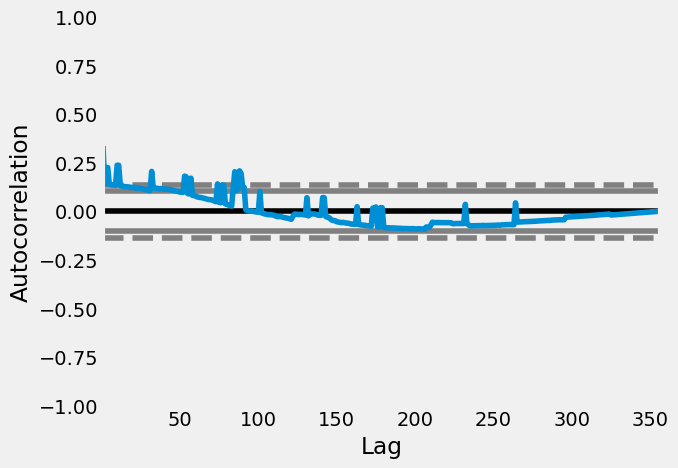

In [9]:
pd.plotting.autocorrelation_plot(df["GiseSatis"])

c:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


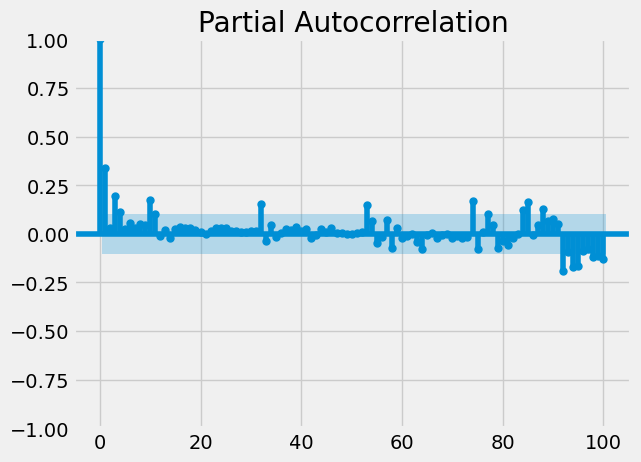

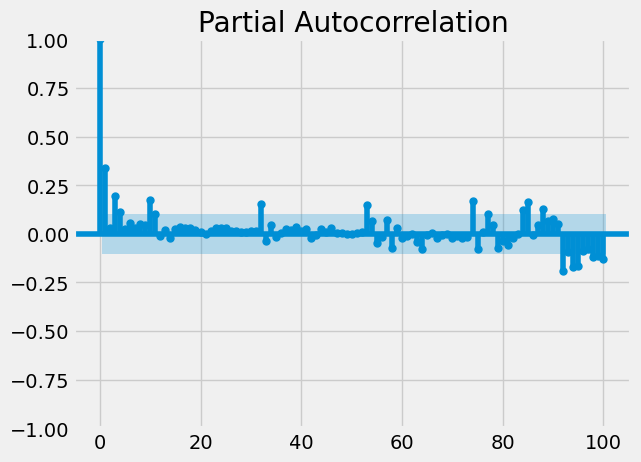

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["GiseSatis"], lags = 100)

In [11]:
p, d, q = 4, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["GiseSatis"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

c:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              GiseSatis   No. Observations:                  356
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1029.326
Date:                Wed, 04 Jan 2023   AIC                           2072.652
Time:                        01:58:21   BIC                           2099.757
Sample:                             0   HQIC                          2083.435
                                - 356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4646      1.222     -0.380      0.704      -2.860       1.931
ar.L2          0.0648      0.310      0.209      0.834      -0.542       0.672
ar.L3          0.0264      0.116      0.228      0.8

In [12]:
predictions = fitted.predict()
print(predictions)

0       0.000000
1      13.274853
2      13.446310
3      13.498497
4      13.621831
         ...    
351    18.908403
352    18.899503
353    18.912078
354    18.913510
355    18.910379
Name: predicted_mean, Length: 356, dtype: float64


In [14]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['GiseSatis'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 6))
model=model.fit()
print(model.summary())

c:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TOSHIBA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                         GiseSatis   No. Observations:                  356
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 6)   Log Likelihood               -1023.735
Date:                           Wed, 04 Jan 2023   AIC                           2073.471
Time:                                   02:01:07   BIC                           2123.587
Sample:                                        0   HQIC                          2093.421
                                           - 356                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6479      0.295     -2.199      0.028      -1.225      -0.070
ar.L2          0.1017      0.107      0.949

In [17]:
predictions = model.predict(len(df), len(df)+20)
print(predictions)

356    19.781709
357    18.618538
358    18.639756
359    19.580799
360    19.973241
361    20.735587
362    19.728318
363    18.813649
364    18.886421
365    19.934392
366    19.876147
367    20.220425
368    20.139190
369    18.935841
370    18.978898
371    19.819925
372    20.051041
373    20.783755
374    19.868782
375    19.047531
376    19.076803
Name: predicted_mean, dtype: float64


<AxesSubplot:>

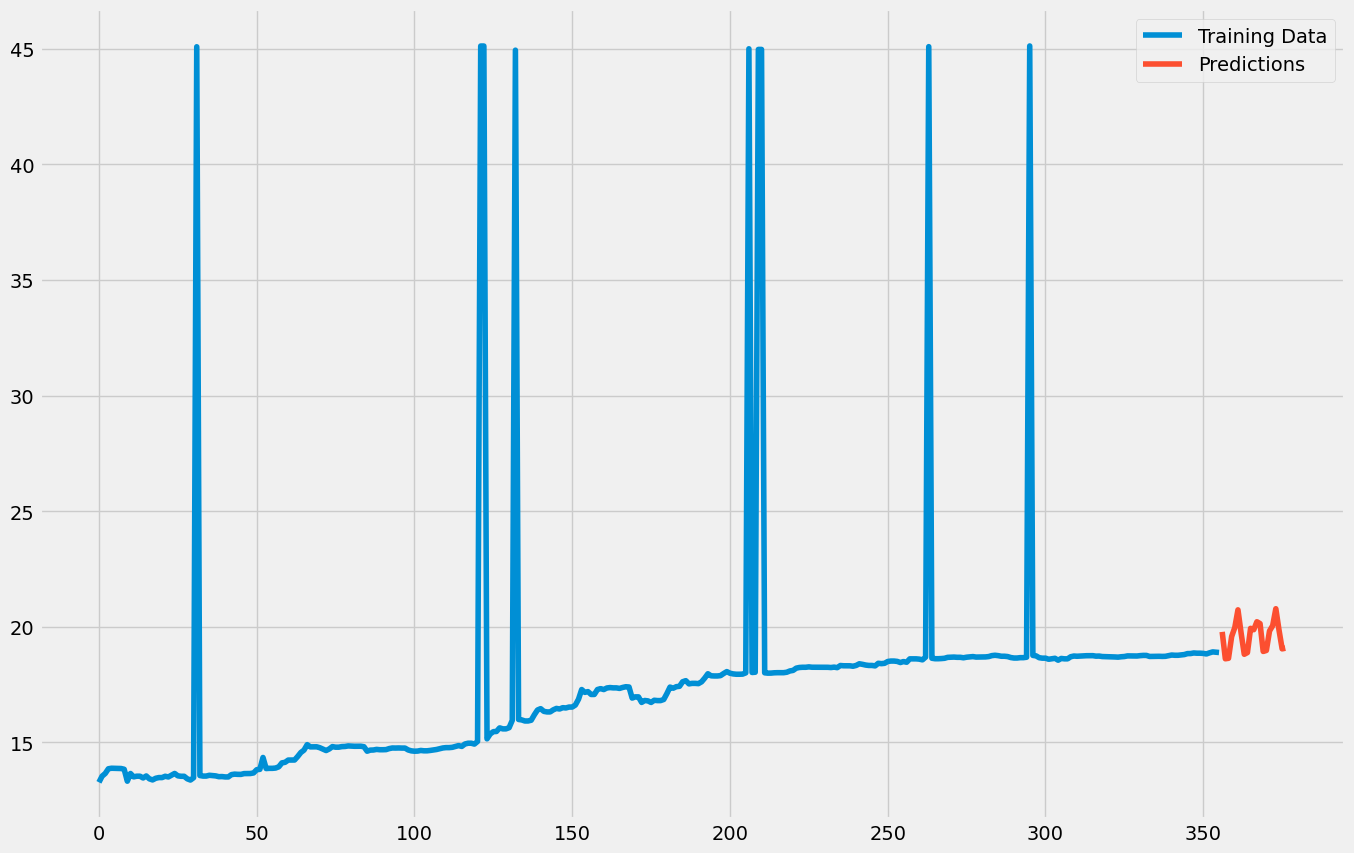

In [18]:
df["GiseSatis"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")